In [1]:
#import modules
import pandas as pd
import numpy as np
import re

# Custom preprocessing function
from utils import preprocess_text


In [2]:
#read csv that includes stock data
transcribed_list= pd.read_csv('transcribed_transcript_list.csv')
transcribed_list.head(10)
print(transcribed_list['transcript'][0])

Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conference Call October 29, 2020  5:00 PM ET
Company Participants 
Tejas Gala - Senior Manager, Corporate Finance and Investor Relations
Tim Cook - Chief Executive Officer
Luca Maestri - Senior Vice President and Chief Financial Officer
Conference Call Participants
Shannon Cross - Cross Research
Jeriel Ong - Deutsche Bank
Katy Huberty - Morgan Stanley
Amit Daryanani - Evercore
Samik Chatterjee - JP Morgan
Krish Sankar - Cowen and Company
Kyle McNealy - Jefferies
Chris Caso - Raymond James
Operator
Good day everyone and welcome to the Apple Inc. Fourth Quarter Fiscal Year 2020 Earnings Conference Call. Today’s call is being recorded.
At this time for opening remarks and introductions, I would like to turn things over to Tejas Gala, Senior Analyst, Corporate Finance and Investor Relations. Please go ahead, sir.
Tejas Gala
Thank you. Good afternoon and thank you for joining us. Speaking first today is Apple’s CEO, Tim Cook, and he will be followed

In [3]:
#add column that includes the total character count for each earning call transcripts
transcribed_list['char_count']= transcribed_list['transcript'].str.len()
transcribed_list[['transcript', 'char_count']].head()

,transcript,char_count
0,Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conf...,49717
1,Apple Inc. (NASDAQ:AAPL) Q3 2020 Results Confe...,46305
2,Apple Inc. (NASDAQ:AAPL) Q2 2020 Results Confe...,46869
3,Apple Inc. (NASDAQ:AAPL) Q1 2020 Results Confe...,46419
4,AbbVie Inc. (NYSE:ABBV) Q3 2020 Results Earnin...,75442


In [4]:
# reference link-https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
# function to remove punctuations
import re,string
#('[^\w\s]','')
def strip_links(text):
    link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#',""]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [5]:
#apply function above to transcript column
transcribed_list['no_punctuation']=transcribed_list['transcript'].map(lambda x:strip_all_entities(strip_links(x)))

print(transcribed_list['no_punctuation'][0:6])

0    Apple Inc NASDAQ AAPL Q4 2020 Earnings Confere...
1    Apple Inc NASDAQ AAPL Q3 2020 Results Conferen...
2    Apple Inc NASDAQ AAPL Q2 2020 Results Conferen...
3    Apple Inc NASDAQ AAPL Q1 2020 Results Conferen...
4    AbbVie Inc NYSE ABBV Q3 2020 Results Earnings ...
5    AbbVie Inc NYSE ABBV Q2 2020 Earnings Conferen...
Name: no_punctuation, dtype: object


In [6]:
#remove quotes and apostrophes
transcribed_list['no_punctuation']=transcribed_list['no_punctuation'].str.replace('[^\w\s]','')
print(transcribed_list['no_punctuation'][0:6])

0    Apple Inc NASDAQ AAPL Q4 2020 Earnings Confere...
1    Apple Inc NASDAQ AAPL Q3 2020 Results Conferen...
2    Apple Inc NASDAQ AAPL Q2 2020 Results Conferen...
3    Apple Inc NASDAQ AAPL Q1 2020 Results Conferen...
4    AbbVie Inc NYSE ABBV Q3 2020 Results Earnings ...
5    AbbVie Inc NYSE ABBV Q2 2020 Earnings Conferen...
Name: no_punctuation, dtype: object


In [7]:
#preprocess latest transcribed list with preprocess function in utils.py file

transcribed_list['preprocess_trans']= transcribed_list['no_punctuation'].apply(lambda x : ' '.join(preprocess_text(x, min_word_length=4)))
print(transcribed_list['preprocess_trans'][0:6])

0    apple nasdaq aapl earn conference call october...
1    apple nasdaq aapl result conference call july ...
2    apple nasdaq aapl result conference call april...
3    apple nasdaq aapl result conference call janua...
4    abbvie nyse abbv result earn conference call o...
5    abbvie nyse abbv earn conference call july com...
Name: preprocess_trans, dtype: object


In [8]:
# determining the words used infrequently @10% of the amount of transcripts
in_freq_words = pd.Series(' '.join(transcribed_list['preprocess_trans']).split()).value_counts()[-400:]
in_freq_words.head()

baltic        1
over11        1
keithweiss    1
fannie        1
palpable      1
dtype: int64

In [9]:
# Removing the infrequent words from the  transcript file
in_freq_words = list(in_freq_words.index)
transcribed_list['clean_trans'] = transcribed_list['preprocess_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in in_freq_words))
transcribed_list['clean_trans'].head()

0    apple nasdaq aapl earn conference call october...
1    apple nasdaq aapl result conference call july ...
2    apple nasdaq aapl result conference call april...
3    apple nasdaq aapl result conference call janua...
4    abbvie nyse abbv result earn conference call o...
Name: clean_trans, dtype: object

In [10]:
transcribed_list.head()
print(transcribed_list.columns)

Index(['Unnamed: 0', 'date', 'ticker', 'title', 'transcript', 'url',
       'char_count', 'no_punctuation', 'preprocess_trans', 'clean_trans'],
      dtype='object')


In [11]:
# Remove the extra columns for working dataframe
transcribed_list_condensed= transcribed_list.drop(columns=['Unnamed: 0', 'url',
       'char_count', 'no_punctuation', 'preprocess_trans', ], axis=1).sample(100)
# Print out the first rows of papers
transcribed_list_condensed.head()
print(transcribed_list_condensed.dtypes)

date           object
ticker         object
title          object
transcript     object
clean_trans    object
dtype: object


In [12]:
#review the output of column of transcripts that were processed
transcribed_list_condensed['clean_trans']

272    morgan stanley nyse earn conference call octob...
60     book hold nasdaq bkng earn conference call aug...
73     citigroup nyse earn conference call april comp...
308    procter gamble nyse earn conference call july ...
76     caterpillar nyse earn conference call july com...
                             ...                        
112    health corporation nyse earn conference call n...
235    company nyse earn conference call november com...
199    international business machine corporation nys...
380    visa nyse earn conference call july company pa...
204    intel corporation nasdaq intc result earn conf...
Name: clean_trans, Length: 100, dtype: object

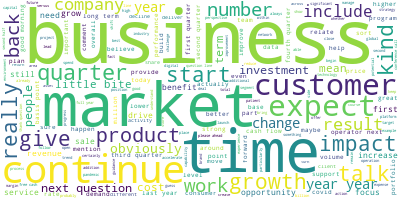

In [13]:
# Import the wordcloud library
from wordcloud import WordCloud

# Assign variable to condensed column
#trans_string = string(list(transcribed_list_condensed['clean_trans'].values))
trans_string = ','.join(list(transcribed_list_condensed['clean_trans'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='blue')

# Generate a word cloud
wordcloud.generate(trans_string)

# Visualize the word cloud
wordcloud.to_image()

In [14]:
#reference code https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
#Gensim is a NLP library used for unsupervised topic modeling which can handle large text collections.
import gensim
from gensim.utils import simple_preprocess
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = transcribed_list_condensed.clean_trans.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['morgan', 'stanley', 'nyse', 'earn', 'conference', 'call', 'october', 'company', 'participant', 'gorman', 'chairman', 'jonathan', 'pruzan', 'conference', 'call', 'participant', 'glenn', 'schorr', 'evercore', 'steven', 'chubak', 'wolfe', 'research', 'brennan', 'hawken', 'investment', 'bank', 'michael', 'carrier', 'bank']


In [15]:
#Dictionary that encapsulates the mapping between normalized words and their integer ids.
import gensim.corpora as corpora
# Create Dictionary
id_pair_withword = corpora.Dictionary(data_words)
# Create Corpus set of documents to train the model
texts = data_words
# Determine the list of word frequency in the document 
corpus = [id_pair_withword.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 4), (1, 2), (2, 2), (3, 1), (4, 3), (5, 1), (6, 11), (7, 1), (8, 2), (9, 3), (10, 1), (11, 2), (12, 11), (13, 12), (14, 1), (15, 3), (16, 11), (17, 3), (18, 7), (19, 4), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 7), (27, 4), (28, 1), (29, 1)]


In [16]:
from pprint import pprint
# number of topics
num_topics = 25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id_pair_withword,
                                       num_topics=num_topics)
# Print the Keyword in the 25 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(22,
  '0.015*"year" + 0.013*"quarter" + 0.009*"business" + 0.008*"thank" + '
  '0.007*"question" + 0.007*"impact" + 0.006*"continue" + 0.006*"time" + '
  '0.005*"market" + 0.005*"expect"'),
 (5,
  '0.024*"year" + 0.013*"quarter" + 0.007*"business" + 0.007*"growth" + '
  '0.007*"continue" + 0.006*"customer" + 0.006*"term" + 0.006*"question" + '
  '0.006*"market" + 0.005*"time"'),
 (1,
  '0.013*"quarter" + 0.012*"year" + 0.011*"business" + 0.008*"question" + '
  '0.006*"market" + 0.005*"thank" + 0.005*"growth" + 0.005*"revenue" + '
  '0.004*"impact" + 0.004*"continue"'),
 (23,
  '0.015*"year" + 0.009*"question" + 0.009*"business" + 0.009*"quarter" + '
  '0.008*"continue" + 0.007*"thank" + 0.006*"growth" + 0.006*"customer" + '
  '0.006*"revenue" + 0.005*"market"'),
 (19,
  '0.014*"year" + 0.013*"quarter" + 0.009*"business" + 0.008*"continue" + '
  '0.007*"question" + 0.006*"first" + 0.006*"time" + 0.006*"customer" + '
  '0.006*"growth" + 0.005*"market"'),
 (14,
  '0.018*"quarter" + 0.01

In [17]:
import pickle

with open('LDA_model.pkl','wb') as f:
    pickle.dump(lda_model, f)

In [19]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the 25 topics defined above
pyLDAvis.enable_notebook()

#load the model file
LDAvis_filepath = os.path.join('LDA_model.pkl'+str(num_topics))
#run model
if 1 == 1:
    LDAvis_prep = pyLDAvis.gensim.prepare(lda_model, corpus, id_pair_withword)
    with open(LDAvis_filepath, 'wb') as f:
        pickle.dump(LDAvis_prep, f)
        
# load pre-prepared pyLDAvis data from disk
with open(LDAvis_filepath, 'rb') as f:
    LDAvis_prep = pickle.load(f)

#save to html file
pyLDAvis.save_html(LDAvis_prep, 'LDA_model.pkl'+ str(num_topics) +'.html')
#display model
LDAvis_prep

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.001751  0.000290       1        1  23.206371
21    -0.001901  0.000478       2        1  17.249268
2     -0.002079 -0.001910       3        1  12.693050
5     -0.002861 -0.002908       4        1  10.460589
24    -0.000137 -0.001121       5        1   6.534112
7     -0.002874  0.000102       6        1   6.513438
22    -0.005375 -0.000905       7        1   4.854956
4      0.003488 -0.000868       8        1   3.337353
3      0.000161 -0.002094       9        1   2.869658
8      0.000963 -0.000396      10        1   2.337996
9     -0.000168 -0.005170      11        1   1.974484
15     0.009622 -0.000782      12        1   1.780014
18    -0.001361 -0.002420      13        1   1.500659
11    -0.002120  0.006963      14        1   1.439509
0     -0.001219  0.002049      15        1   0.657426
17     0.001798  0.000274      16        1   0.636698
10     0.000130 -0.000121      17        1   0.577899
14    -0.000247  0.001013      18        1   0.399794
23     0.000869 -0.001056      19        1   0.366347
12    -0.000489  0.003657      20        1   0.357296
16    -0.002133 -0.000574      21        1   0.084954
19     0.002990  0.000765      22        1   0.078096
6      0.001311  0.000175      23        1   0.072756
1      0.001334  0.002555      24        1   0.015797
20     0.002048  0.002003      25        1   0.001477, topic_info=          Term         Freq        Total Category  logprob  loglift
1099      year  6336.000000  6336.000000  Default  30.0000  30.0000
785    quarter  5416.000000  5416.000000  Default  29.0000  29.0000
131   business  3291.000000  3291.000000  Default  28.0000  28.0000
787   question  3122.000000  3122.000000  Default  27.0000  27.0000
1000     thank  3142.000000  3142.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
562       line     0.020198  1459.196167  Topic25  -5.7168  -0.0649
391      first     0.023194  1985.067627  Topic25  -5.5785  -0.2343
83        back     0.019236  1333.530151  Topic25  -5.7656  -0.0236
612    million     0.022158  1972.397095  Topic25  -5.6242  -0.2736
586     market     0.023190  2256.577393  Topic25  -5.5787  -0.3627

[2230 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6581      1  0.383294     abap
6581      2  0.383294     abap
1100      1  0.169905  ability
1100      2  0.147880  ability
1100      3  0.179344  ability
...     ...       ...      ...
8347      7  0.064959   yervoy
8347      8  0.064959   yervoy
8347      9  0.064959   yervoy
8348      1  0.189741  zeposia
8348      2  0.189741  zeposia

[9340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 22, 3, 6, 25, 8, 23, 5, 4, 9, 10, 16, 19, 12, 1, 18, 11, 15, 24, 13, 17, 20, 7, 2, 21])

In [20]:
#save py LDA model
with open('LDAvis_prep.pkl','wb') as f:
    pickle.dump(LDAvis_prep, f)